# **1. Perkenalan Dataset: Customer Churn Prediction**

### Deskripsi Dataset
**Customer Churn** mengacu pada fenomena di mana pelanggan menghentikan hubungan atau langganan mereka dengan perusahaan. Ini mewakili tingkat di mana pelanggan berhenti menggunakan produk atau layanan perusahaan dalam periode tertentu. Churn adalah metrik penting bagi bisnis karena berdampak langsung pada pendapatan, pertumbuhan, dan retensi pelanggan.

Dalam konteks dataset ini, label **Churn** menunjukkan apakah pelanggan telah berhenti berlangganan atau tidak:
- **Churned:** Pelanggan yang memutuskan untuk menghentikan langganan.
- **Non-churned:** Pelanggan yang terus berlangganan.

Memahami churn sangat penting bagi bisnis untuk mengidentifikasi pola dan faktor yang berkontribusi terhadap atrisi pelanggan. Dengan menganalisis perilaku churn, perusahaan dapat mengembangkan strategi retensi dan meningkatkan kepuasan pelanggan.

**Sumber Dataset:**
Dataset ini diperoleh dari Kaggle: *Customer Churn Dataset*. Dataset ini bersifat tabular dan mencakup berbagai fitur pelanggan seperti demografi, perilaku penggunaan, dan riwayat pembayaran.

# **2. Import Library**

Pada tahap ini, kita akan mengimpor pustaka Python yang dibutuhkan untuk manipulasi data dan visualisasi:
* **Pandas:** Untuk manipulasi dan analisis data tabular (DataFrame).
* **Numpy:** Untuk operasi numerik.
* **Matplotlib & Seaborn:** Untuk visualisasi data (EDA).
* **Sklearn (Preprocessing):** Untuk teknik pengolahan data seperti Label Encoding.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder

# Konfigurasi tampilan plot
sns.set(style="whitegrid")
print("Library berhasil diimpor!")

Library berhasil diimpor!


# **3. Memuat Dataset**

Kita akan memuat dataset pelatihan (**training set**) dari folder `data_raw`. Dataset ini disimpan dalam format CSV.
Kita akan membaca file `customer_churn_dataset-training-master.csv` ke dalam sebuah Pandas DataFrame.

In [6]:
# Definisikan path file (relatif terhadap folder preprocessing)
file_path = 'data_raw\customer_churn_dataset-training-master.csv'

# Cek apakah file ada
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print(f"Dataset berhasil dimuat! Dimensi: {df.shape}")
    display(df.head())
else:
    print(f"File tidak ditemukan di: {file_path}")

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13524\1567729494.py:2: SyntaxWarning: invalid escape sequence '\c'
  file_path = 'data_raw\customer_churn_dataset-training-master.csv'


Dataset berhasil dimuat! Dimensi: (440833, 12)


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, kita melakukan eksplorasi untuk memahami karakteristik data:
1.  **Info Dataset:** Memeriksa tipe data setiap kolom.
2.  **Missing Values:** Mengecek apakah ada data yang kosong.
3.  **Duplikasi:** Memeriksa apakah ada baris data yang ganda.
4.  **Distribusi Target:** Melihat keseimbangan jumlah data antara pelanggan yang Churn dan tidak (Imbalance Check).

=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB

=== Jumlah Missing Value ===
CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage F

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


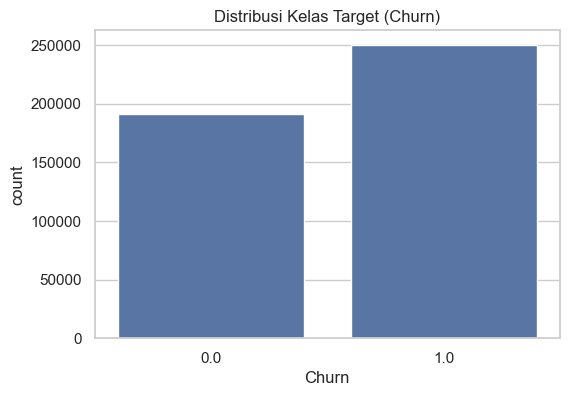

In [7]:
# 1. Cek Informasi Umum
print("=== Info Dataset ===")
df.info()

# 2. Cek Missing Values
print("\n=== Jumlah Missing Value ===")
print(df.isnull().sum())

# 3. Cek Duplikasi
print(f"\nJumlah Data Duplikat: {df.duplicated().sum()}")

# 4. Statistik Deskriptif
display(df.describe())

# 5. Visualisasi Target Churn
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title('Distribusi Kelas Target (Churn)')
plt.show()

# **5. Data Preprocessing**

Berdasarkan hasil EDA, kita akan melakukan pembersihan data agar siap digunakan untuk pemodelan Machine Learning. Langkah-langkah yang dilakukan adalah:

1.  **Handling Missing Values:** Menghapus baris yang memiliki nilai kosong (`dropna`), karena jumlahnya sangat sedikit.
2.  **Drop Irrelevant Columns:** Menghapus kolom `CustomerID` karena merupakan identitas unik yang tidak berkontribusi pada pola prediksi churn.
3.  **Encoding Categorical Data:** Mengubah kolom kategori menjadi angka menggunakan **Label Encoding** agar dapat diproses oleh model. Kolom yang di-encode adalah:
    * `Gender`
    * `Subscription Type`
    * `Contract Length`
4.  **Saving Data:** Menyimpan data yang sudah bersih ke dalam file CSV baru (`customer_churn_cleaned.csv`) di folder `preprocessing`.

In [9]:
# 1. Menangani Missing Values
initial_rows = df.shape[0]
df_clean = df.dropna()
print(f"Menghapus {initial_rows - df_clean.shape[0]} baris data kosong.")

# 2. Menghapus Kolom Tidak Relevan
if 'CustomerID' in df_clean.columns:
    df_clean = df_clean.drop(columns=['CustomerID'])
    print("Kolom 'CustomerID' dihapus.")

# 3. Encoding Data Kategorikal
cat_columns = df_clean.select_dtypes(include=['object']).columns
print(f"Kolom Kategori yang di-encode: {list(cat_columns)}")

le = LabelEncoder()
for col in cat_columns:
    df_clean[col] = le.fit_transform(df_clean[col])

# Tampilkan hasil akhir
print("\nData setelah preprocessing:")
display(df_clean.head())

# 4. Simpan Data Bersih
output_file = 'customer_churn_cleaned.csv'
df_clean.to_csv(output_file, index=False)
print(f"\nSukses! Data bersih tersimpan sebagai '{output_file}'")

Menghapus 1 baris data kosong.
Kolom 'CustomerID' dihapus.
Kolom Kategori yang di-encode: ['Gender', 'Subscription Type', 'Contract Length']

Data setelah preprocessing:


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0



Sukses! Data bersih tersimpan sebagai 'customer_churn_cleaned.csv'
